In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Most important part of preprocessing 
# Creating a data structure with 60 timesteps( 60 comes with hit and trail) and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

In [9]:
X_train
y_train

[0.08627874097775134,
 0.08471612471166012,
 0.07454051640747084,
 0.07883771113922167,
 0.07238261775429711,
 0.06663442220403304,
 0.06315574075452046,
 0.06782498697819772,
 0.06823424361931696,
 0.07601011980058048,
 0.08082818662102831,
 0.058077237889723854,
 0.044683384180370544,
 0.044218319815462426,
 0.04202321601309622,
 0.04070243321675715,
 0.030173375995237728,
 0.03512166083785995,
 0.040460599747005,
 0.046859885408140456,
 0.050673413200386985,
 0.04879455316615822,
 0.04027457400104173,
 0.03787484187811596,
 0.045669320633975774,
 0.04224644690825208,
 0.03212664632785178,
 0.04187439541632565,
 0.043083562765086625,
 0.04877595059156181,
 0.04635761589403975,
 0.03748418781159313,
 0.041706972244958784,
 0.053407991666046595,
 0.06810402559714268,
 0.060011905647741615,
 0.03722375176724457,
 0.04920380980727734,
 0.03828409851923509,
 0.04524146141826024,
 0.03768881613215269,
 0.03287074931170475,
 0.025783168390505318,
 0.026304040479202317,
 0.010622070094501002

In [0]:
# converting into numpy arary so RNN will understand this
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [12]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [14]:
# RNN Implemention

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [15]:
# Initialising
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0433
Epoch 2/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0057
Epoch 5/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0054
Epoch 8/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 14s 11ms/step - loss

In [0]:
# Make Predictions

# Real stock price of 2017 dataset
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')


In [17]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [0]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [21]:
dataset_total

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
5       313.70
6       310.59
7       314.43
8       311.96
9       314.81
10      312.14
11      319.30
12      294.16
13      291.91
14      292.07
15      287.68
16      284.92
17      284.32
18      287.95
19      290.41
20      291.38
21      291.34
22      294.23
23      296.39
24      302.44
25      303.18
26      304.87
27      302.81
28      304.11
29      304.63
         ...  
1248    800.40
1249    790.22
1250    796.76
1251    795.84
1252    792.36
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
0       778.81
1       788.36
2       786.08
3       795.26
4       806.40
5       807.86
6       805.00
7       807.14
8       807.48
9       807.08
10      805.81
11      805.12
12      806.91
13      807.25
14      822.30
15      829.62
16      837.81
17      834.71
18      814.66
19      796.86
Name: Open, Length: 1278, dtype: float64

In [22]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [23]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [24]:
# Making Data structre for prediction 

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])


# Converting in numpy array then RNN will understand

X_test = np.array(X_test)
X_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [25]:
# Reshaping data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [26]:
# Making Prediction for stock price

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price

array([[0.93566626],
       [0.9301797 ],
       [0.92960036],
       [0.9320307 ],
       [0.938224  ],
       [0.94915533],
       [0.95995086],
       [0.96513915],
       [0.96593887],
       [0.96503425],
       [0.9641383 ],
       [0.96352863],
       [0.96324384],
       [0.9642003 ],
       [0.9660577 ],
       [0.97407424],
       [0.98706263],
       [1.0016255 ],
       [1.0104327 ],
       [1.0041448 ]], dtype=float32)

In [27]:
# Converting into feathered value to using inverse transform Original Price 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

predicted_stock_price

array([[782.09674],
       [779.1474 ],
       [778.83594],
       [780.1424 ],
       [783.4717 ],
       [789.3479 ],
       [795.1512 ],
       [797.9402 ],
       [798.3701 ],
       [797.8838 ],
       [797.4022 ],
       [797.0744 ],
       [796.9213 ],
       [797.43555],
       [798.434  ],
       [802.74335],
       [809.7254 ],
       [817.5538 ],
       [822.2882 ],
       [818.908  ]], dtype=float32)

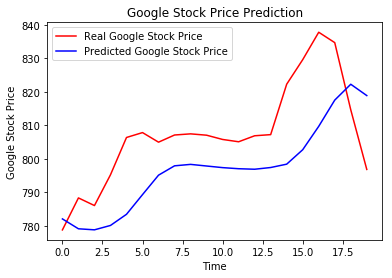

In [28]:
# Visualising Result

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [0]:
regressor.save('model.h5')

In [0]:
from google.colab import files
files.download('model.h5')